In [1]:
from tkinter import *
from tkinter import ttk
from tkinter.ttk import Progressbar
from tkinter.ttk import Combobox
from tkinter.ttk import Notebook
from tkinter import filedialog as fd
from tkinter import messagebox
from tkinter.messagebox import showinfo
import tkinter as tk
import tkinter.font
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore
from sklearn import decomposition
from IPython.display import display, Latex
from sklearn.cluster import KMeans
import pickle
import sklearn.cluster as cluster
from pathlib import Path
import os
import glob
from tqdm import tqdm_notebook
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import pairwise_logrank_test
import IPython.display as display
from PIL import ImageTk, Image
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from utils1  import *
from collections import Counter
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import csv
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:280: SettingWithCopyWarning: 
A valu

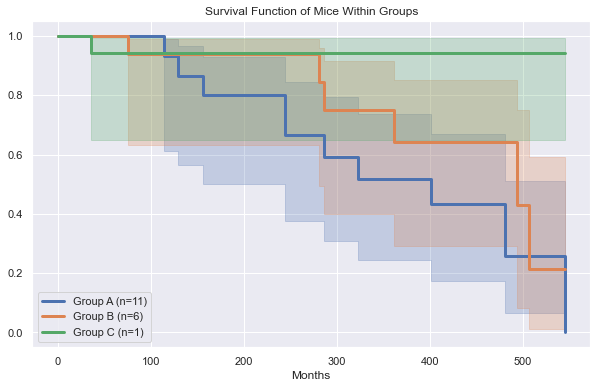

In [13]:
class Homepage():
    def __init__(self, parent):
        self.gui(parent)

    def gui(self, parent):
        if parent == 0:
            self.w1 = Tk()
            self.w1.configure(bg = '#c0d3ff')
            self.w1.geometry('2000x2000')
        else:
            self.w1 = Frame(parent)
            self.w1.configure(bg = '#c0d3ff')
            self.w1.place(x = 0, y = 0, width = 500, height = 500)
        self.button1 = Button(self.w1, text = "Input the single nucleus features per image", bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button1.place(x = 50, y = 40, width = 400, height = 75)
        self.button1['command'] = self.Features_list
        self.button2 = Button(self.w1, text = "Mice Clinical data input", bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button2.place(x = 50, y = 140, width = 400, height = 75)
        self.button2['command'] = self.Mice_data
        self.button4 = Button(self.w1, text = "Data Analysis - Boruta, Kmeans and PCA", bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button4.place(x = 50, y = 340, width = 400, height = 75)
        self.button4['command'] = self.analyze
        self.button5 = Button(self.w1, text = "To results", bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 8), cursor = "arrow", state = "normal")
        self.button5.place(x = 330, y = 440, width = 120, height = 40)
        self.button5['command'] = self.to_results
        self.button5 = Button(self.w1, text = "Data preprocessing", bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 8), cursor = "arrow", state = "normal")
        self.button5.place(x = 50, y = 240, width = 400, height = 75)
        self.button5['command'] = self.clean_data
        self.ltext1 = Entry(self.w1, bg = "#ffffff", fg = "#000000", font = tkinter.font.Font(family = "Rockwell", size = 20), cursor = "arrow", state = "normal")
        self.ltext1.place(x = 170, y = 0, width = 160, height = 32)
        self.ltext1.insert(INSERT, "Pathomics 3")

    def Mice_data(self):
        root=tk.Toplevel()
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        filetypes=(('text files', '*.txt'), ('All files', '*.*'),('Excel files', '*.xls'),('CSV files','*.csv')) 
        filename=fd.askopenfilename(initialdir = '/', filetypes = filetypes)
        file=pd.read_csv(filename)#here will be directory for intermediate file, 
        file.to_csv(os.path.join(folder, 'mice.csv')) 
        T = Text(root, height = 2, width = 40)
        l = Label(root, text = "Mice file selected", )
        l.config(font =("Courier", 8))
        T.pack()
        l.pack()

    def analyze(self):
        root=tk.Toplevel()
        def zScoreEach(data):
            for col in data.columns:
                data[col] = zscore(data[col]).astype(float)
            return data
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        label = 'Mouse' #define desired label here
        if label == 'Line':
            rawdf = pd.concat([rawlabels['Line'],rawdata],axis=1)
            rawdf = rawdf[rawdf.Line != '0000']
            rawlabels = rawlabels[rawlabels.Line != '0000']
            rawdf.drop('Line',axis=1, inplace=True)
            rawdata = rawdf.copy()
            rawdata.to_pickle(os.path.join(folder, 'rawdata_line.pickle')) 
            rawlabels.to_pickle(os.path.join(folder, 'rawlabel_line.pickle'))
        if label == 'Line':
            rawdata = pd.read_pickle(os.path.join(folder,'rawdata_line.pickle')) #Change to rawdata_line if running Line
            rawlabel = pd.read_pickle(os.path.join(folder,'rawlabel_line.pickle')) 
        else:    
            rawdata = pd.read_pickle(os.path.join(folder,'rawdata.pickle'))  
            rawlabel = pd.read_pickle(os.path.join(folder,'rawlabel.pickle'))
        
        # rawdata = pd.read_pickle(os.path.join(folder,'rawdata_line.pickle')) #Change to rawdata_line if running Line
        rawdatacopy = rawdata.copy()
        zscore_rawdata = zScoreEach(rawdatacopy)
        rawlabel = pd.read_pickle(os.path.join(folder,'rawlabel.pickle'))
        # rawlabel = pd.read_pickle(os.path.join(folder,'rawlabel_line.pickle')) #Change to rawlabels_line if running Line
    
        my_list = zscore_rawdata.columns.values.tolist() 
        X = zscore_rawdata[my_list].values
        X = pd.DataFrame(X).fillna(value=0).values
        y = rawlabel[label].values.ravel() 
       
        F = Text(root, height = 2, width = 40)
        p = Label(root, text = "Boruta in process",bg='Red')
        p.config(font =("Courier", 8))
        F.pack()
        p.pack()
        
        # define random forest classifier, with utilising all cores and
        # sampling in proportion to y labels
        rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    
        # define Boruta feature selection method
        feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

        # find all relevant features - 5 features should be selected
        feat_selector.fit(X, y)

        # check selected features - first 5 features are selected
        feat_selector.support_

        # check ranking of features
        feat_selector.ranking_

        final_features = list()
        indexes = np.where(feat_selector.support_ == True)
        for x in np.nditer(indexes):
            final_features.append(my_list[x])
    
        pic = rawdata[final_features]
        piclabels = rawlabel.copy()
       
        with open(os.path.join(folder, 'pic.pickle'), "wb") as f:
            pickle.dump((pic,piclabels), f)
 
        with open(os.path.join(folder, 'pic.pickle'), "rb") as f: #Include the '_line' if you are running Line/QTL analysis!
            rawdata,rawlabels = pickle.load(f) 
  
        features = rawdata.columns.values.tolist()
        Groups = 'Mouse'
        pca_df,pca,pca_transformed = pcaCalcOneExp(zScoreEach(rawdata),rawlabels[Groups],'PCA',-1,nColor=0,nShades=0)
        K=range(1,12)
        wss = []
        for k in K:
            kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
            kmeans=kmeans.fit(rawdata)
            wss_iter = kmeans.inertia_
            wss.append(wss_iter)
                
        max=0
        clusters=0
        for i in range(3,13):
            labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(rawdata).labels_
            if max < metrics.silhouette_score(rawdata,labels,metric="euclidean",sample_size=1000,random_state=200):
                     max= metrics.silhouette_score(rawdata,labels,metric="euclidean",sample_size=1000,random_state=200)
                     num_of_clusters=i
        print(num_of_clusters)    
        kmeans_pca,xlim_kmeans,ylim_kmeans = kmeansPlot(num_of_clusters,pca_transformed,pca,rawlabels[Groups])
        kmeans_pca.to_csv(os.path.join(folder,'kmeans_pca.csv'))
        rawlabels.to_pickle(os.path.join(folder, 'rawlabel_line.pickle'))
        T = Text(root, height = 2, width = 40)
        l = Label(root, text = "Analysis complete",bg='Red')
        l.config(font =("Courier", 8))
        T.pack()
        l.pack()
    def Features_list(self):
        self.w1.destroy()
        directory = input("Enter the path of your folder:")
        read_files = glob.glob(directory + "/*.txt")
        average_all = pd.DataFrame([])
        list1 = []
        for file in read_files:
            df = pd.read_csv(file, sep = '\t')
            image = df.iloc[0,0]
            numbers = df.iloc[:,5:]
            average = numbers.mean(axis = 0, skipna = False)
            df_average = pd. DataFrame([average])
            df_average.insert(0,'Image', image)
            average_all = pd.concat([average_all, df_average])

        
        folder_name = 'Results_GUI'
        folder = os.path.join(directory, folder_name)
        if os.path.exists(folder):
            os.makedirs(folder)
        #important to change the path in the line of code below up until results, which means (results/Summary_Table.csv')
        # should be added to the path inputed
        average_all.to_csv(r'C:\Users\user\Documents\itamar\GUI')

    def to_results(self):
        self.w1.destroy()
        a=Analysis_page(0)
        a.w1.mainloop()
    
    def clean_data(self):
        root=tk.Toplevel()
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        data_file = pd.read_csv(os.path.join(folder, 'summary_table_GUI.csv')) #Summary table file name
        rawdata = data_file.iloc[:,1:]
        rawdata.to_pickle(os.path.join(folder, 'rawdata.pickle'))
        rawdata = pd.read_pickle(os.path.join(folder, 'rawdata.pickle'))
        rawdata.to_csv(r'C:\Users\user\Documents\itamar\GUI\Test1.csv')
        labels = data_file = data_file.iloc[:,:1]
        mousedata = {'Mouse':data_file['Image'].str[2:6]} #Gets the mouse characters from the 32 character code in a seperate vector 
        linedata = {'Line':data_file['Image'].str[21:25]}
        slicedata = {'Series':data_file['Image'].str[38:47]}
        posdata = {'Patch Position (X_Y)':data_file['Image'].str[48:]}
        codedata = {'CodeSeries':data_file['Image'].str[:47]}
        Mouse = pd.DataFrame(mousedata)
        Lines = pd.DataFrame(linedata)
        Slice = pd.DataFrame(slicedata)
        Position = pd.DataFrame(posdata)
        Code = pd.DataFrame(codedata)
        Position['Patch Position (X_Y)'] = Position['Patch Position (X_Y)'].str.replace('.png.png.txt', '')
        labels = pd.concat([Mouse,Lines,Slice,Code,data_file['Image']],axis = 1)
        
        X_ROI = []
        Y_ROI = []

        for i in Position['Patch Position (X_Y)']:
            d= i.split('_',1)
            xroi = int(d[0])
            yroi = int(d[1])
            X_ROI.append(xroi)
            Y_ROI.append(yroi)
        labels = labels.reset_index()
        labels = pd.concat([labels,pd.DataFrame(X_ROI, columns=["X_ROI"]), pd.DataFrame(Y_ROI, columns=["Y_ROI"])],axis = 1)
        del labels['index']
        labels.to_pickle(os.path.join(folder, 'rawlabel.pickle'))
        rawlabels = pd.read_pickle(os.path.join(folder, 'rawlabel.pickle'))
        T = Text(root, height = 2, width = 40)
        l = Label(root, text = "Data Preprocessing Complete",bg='Red')
        l.config(font =("Courier", 8))
        T.pack()
        l.pack()

    
class Analysis_page():
    def __init__(self, parent):
        self.gui(parent)
        self.parent=parent


    def gui(self, parent):
        if parent == 0:
            self.w1 = Tk()
            self.w1.configure(bg = '#c0d3ff')
            self.w1.geometry('2000x2000')
        else:
            self.w1 = Frame(parent)
            self.w1.configure(bg = '#c0d3ff')
            self.w1.place(x = 0, y = 0, width = 1200, height = 1000)
        self.button1 = Button(self.w1, text = "Confusion Matrix", bg = "#ffffff", fg = "#080808", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button1.place(x = 160, y = 20, width = 200, height = 42)
        self.button1['command']= self.Confusion_matrix 
        self.button2 = Button(self.w1, text = "Kaplan Meir Graph", bg = "#ffffff", fg = "#0b0b0b", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button2.place(x = 160, y = 100, width = 200, height = 42)
        self.button2['command']= self.Kaplan_Meier_graph 
        self.button3 = Button(self.w1, text = "Log-rank test analysis", bg = "#ffffff", fg = "#090909", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button3.place(x = 160, y = 180, width = 200, height = 42)
        self.button3['command']= self.Log_rank_test_analysis
        self.button4 = Button(self.w1, text = "Anova table ", bg = "#ffffff", fg = "#060606", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button4.place(x = 160, y = 260, width = 200, height = 42)
        self.button4['command']= self.Anova_table 
        self.button5 = Button(self.w1, text = "Cox Analysis", bg = "#ffffff", fg = "#060606", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button5.place(x = 160, y = 340, width = 200, height = 42)
        self.button5['command']= self.Cox_analysis
        self.button6 = Button(self.w1, text = "Feature distribution groups ", bg = "#ffffff", fg = "#060606", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button6.place(x = 160, y = 420, width = 200, height = 42)
        self.button6['command']= self.Feature_distribution_groups
        self.button7 = Button(self.w1, text = "Home", bg = "#ffffff", fg = "#080808", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button7.place(x = 30, y = 390, width = 90, height = 32)
        self.button7['command']=self.Home
        self.button8 = Button(self.w1, text = "Clear page", bg = "#ffffff", fg = "#080808", font = tkinter.font.Font(family = "Rockwell", size = 10), cursor = "arrow", state = "normal")
        self.button8.place(x = 30, y = 360, width = 90, height = 32)
        self.button8['command']=self.clear_frame
    def Home(self):
        self.w1.destroy()
        a=Homepage(0)
        a.w1.mainloop()
    def Kaplan_Meier_graph(self):
        #data2 = self.Confusion_matrix()
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        data2=pd.read_csv(os.path.join(folder, 'ByGroups_QTL3.csv'))
        data2['Age']=0
        data2['L/D']=1
        data1= pd.read_csv(os.path.join(folder, 'mice.csv'))
        for i in range(len(data2)):
            for j in range(len(data1)):
                if data2['Labels'][i]==data1['Mouse'][j]:
                    data2['Age'][i]=data1['Age'][j]
                    data2['L/D'][i]=data1['L/D'][j]
                    j+=1
            i+=1
        data2=data2[data2['Age']>0]
        data2=data2.reset_index()
        data3=data2.drop(["Labels","Age","L/D"],axis=1)
        data3=data3.drop(["index"],axis=1)
        data3['Max']=data3.max(axis=1)
        for i in range (3): 
            for j in range(len(data2)):
                if data2[str(i)][j]>=data3['Max'][j]:  #Threshold needs to be optimized
                    data2[str(i)][j]=1
                else:
                    data2[str(i)][j]=0
                j+=1
            i+=1
        to_groups(data2)
        kmf = KaplanMeierFitter() 
        T=data2['Age']
        headings=data2.columns.tolist()
        for i in range(len(headings)-5):
            kmf.fit(T,data2[headings[i+2]],label=headings[i+2]+' (n=%d)'%data2[headings[i+2]].tolist().count(1))
            kmf.plot(linewidth=3.0)
            i+=1
        figure = plt.gcf()
        figure.set_size_inches(10,6)
        plt.title('Survival Function of Mice Within Groups');
        plt.xlabel('Months')
        plt.savefig(os.path.join(folder,'Kaplan meier graph.png'))
        data2.to_csv(os.path.join(folder,'Kaplan meier data.csv'))
        results = multivariate_logrank_test(data2['Age'], data2['Groups'], data2['L/D'],weightings = 'wilcoxon') #log rank analysis
        d={'test statistic':[results.test_statistic],'p value':[results.p_value]} #puttin result in data frame
        lr=DataFrame(data=d)
        lr_frame=Frame(self.w1)
        style=ttk.Style()
        style.configure("Treeview",background="grey",foreground="black",rowheight=5,colheight=5)
        lr_frame.pack(side=RIGHT, anchor = NE)
        tv1=ttk.Treeview(lr_frame)
        tv1.place()
        tv1["column"]=list(lr.columns)
        tv1["show"]="headings"
        for column in tv1["column"]:
            tv1.heading(column, text=column)
        df_rows=lr.to_numpy().tolist()
        for row in df_rows:
            tv1.insert("","end",values=row)
        tv1.pack(side=BOTTOM, anchor = NE)#up until here placing the dataframe
        
        '''
        figure=Figure(figsize=(5,4),dpi=100)
        canvas=FigureCanvasTkAgg(figure,self.w1)
        canvas.draw()
        canvas.get_tk_widget().pack()
        '''
        self.photo2=tk.PhotoImage(file=(r'C:\Users\user\Documents\itamar\GUI\Kaplan meier graph.png'))
        label2=tk.Label(self.w1,image=self.photo2,width= 600,height=400)
        label2.pack(side=TOP, anchor=NE)
    def clear_frame(self):
        self.w1.winfo_children()[8].destroy()
        self.w1.winfo_children()[9].destroy()
        self.w1.winfo_children()[10].destroy()
    def Confusion_matrix(self):
        Groups='Mouse'
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        with open(os.path.join(folder, 'pic.pickle'), "rb") as f: #Include the '_line' if you are running Line/QTL analysis!
            rawdata,rawlabels = pickle.load(f) 
        array = rawlabels[Groups]
        labels = list(array)
        kmeans_pca=pd.read_csv(os.path.join(folder,'kmeans_pca.csv'))
        kgroups = kmeans_pca['Groups']
        pred = list(kgroups)
        a = dict(Counter(array))
        df = pd.DataFrame({'Labels': labels, 'Clusters': pred})
        ct = pd.crosstab(df['Labels'], df['Clusters'],normalize = 'index')
       # fig, ax = plt.subplots(figsize=(20,10))         
        #sns.heatmap(ct, annot=True)
        #ax.set_ylim([len(np.unique(array)),0])
        #for t in ax.texts: t.set_text(math.floor(float(t.get_text())*100))
        #for t in ax.texts: t.set_text((t.get_text()) + "%")
        KM_filename = 'ByGroups_QTL3.csv'
        with open(os.path.join(folder, KM_filename),'w') as outfile:
            ct.to_csv(outfile, header=True)
       
        return ct
        #new_folder_name = 'Confusion Matrix'
        #new_folder = os.path.join(folder, new_folder_name)
        #if not os.path.exists(folder):
         #   os.makedirs(new_folder)
        #plt.savefig(os.path.join(new_folder,'Confusion matrix.png'))
        #self.photo=tk.PhotoImage(file=(r'C:\Users\user\Documents\itamar\GUI\Confusion matrix.png'))
        #self.label=tk.Label(self.w1,image=self.photo,width=700,height=500)
        #self.label.pack(side=BOTTOM)
    def Cox_analysis(self):
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        data_cox=pd.read_csv(os.path.join(folder,'Kaplan meier data.csv'))
        for i in range(len(data_cox)):
            if data_cox['Groups'][i]== 'A':
                data_cox['Groups'][i]= 1
            if data_cox['Groups'][i]== 'B':
                data_cox['Groups'][i]= 2
            if data_cox['Groups'][i]== 'C':
                data_cox['Groups'][i]= 3
            if data_cox['Groups'][i]== 'Ignore':
                data_cox['Groups'][i]= 0
        data_cox=data_cox.drop(['Unnamed: 0','index'],axis=1)
        print(data_cox)
            #if data_cox['Groups'][i]== 'D':
                #data_cox['Groups'][i]= 4
    #if data_cox['Groups'][i]== 'E':
        #data_cox['Groups'][i]= 5
    #if data_cox['Groups'][i]== 'F':
        #data_cox['Groups'][i]= 6
   # One may add these in dependednt on the optimal ammount of clusters
        cph=CoxPHFitter(penalizer=0.1)
        cph.fit(data_cox,'Age',event_col='L/D',show_progress=True)
        cph.print_summary()
    def Log_rank_test_analysis(self):
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        data=pd.read_csv(os.path.join(folder,'Kaplan meier data.csv'))
        results = multivariate_logrank_test(data['Age'], data['Groups'], data['L/D'],weightings = 'wilcoxon')
        results.print_summary()
    def Anova_table(self):
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        rawdata=pd.read_pickle(os.path.join(folder,'rawdata.pickle'))
        features = rawdata.columns.values.tolist()
        kmeans_pca=pd.read_csv(os.path.join(folder,'kmeans_pca.csv'))
        rawdata.reset_index(drop=True, inplace=True)
        kmeans_pca.reset_index(drop=True, inplace=True)
        raw3 = pd.concat([rawdata,kmeans_pca],axis=1)
        Data_anov=ANOVE_DESC_TABLE(raw3,features,title='Sarcoma Mouse 3 Groups',dep = 'Groups',groupList =['Group A','Group B','Group C',]) #Change groupList based on your num_of_clusters 
        Data_anov.to_excel(os.path.join(folder,'Anova table.xlsx'))
        Data_anov.insert(0, "Features", Data_anov.index)
        anova_frame=Frame(self.w1)
        style=ttk.Style()
        style.configure("Treeview",background="grey",foreground="black",rowheight=30,colheight=500)
        anova_frame.pack(side=BOTTOM,pady=55,padx=40)
        tree_scrollx=Scrollbar(anova_frame,orient='horizontal')
        tree_scrollx.pack(side=BOTTOM,fill=X)
        tree_scrolly=Scrollbar(anova_frame)
        tree_scrolly.pack(side=RIGHT,fill=Y)
        tv1=ttk.Treeview(anova_frame,yscrollcommand=tree_scrolly.set,xscrollcommand=tree_scrollx.set)
        tv1.place(relheight=50, relwidth=20)
        tv1["column"]=list(Data_anov.columns)
        tv1["show"]="headings"
        for column in tv1["column"]:
            tv1.heading(column, text=column)
        df_rows=Data_anov.to_numpy().tolist()
        for row in df_rows:
            tv1.insert("","end",values=row)
        tree_scrolly.config(command=tv1.yview)
        tree_scrollx.config(command=tv1.xview)
        tv1.pack(side=BOTTOM,padx=35,pady=5)
    
    def Feature_distribution_groups(self):
        folder = (r'C:\Users\user\Documents\itamar\GUI')#here put in path of intermediate folder
        rawdata=pd.read_pickle(os.path.join(folder,'rawdata.pickle'))
        features = rawdata.columns.values.tolist()
        rawdata.reset_index(drop=True, inplace=True)
        rawlabels=pd.read_pickle(os.path.join(folder,'rawlabel.pickle'))
        rawlabels.reset_index(drop=True, inplace=True)
        kmeans_pca=pd.read_csv(os.path.join(folder,'kmeans_pca.csv'))
        kmeans_pca['Groups'].reset_index(drop=True, inplace=True)
        raw2 = pd.concat([rawdata,rawlabels,kmeans_pca['Groups']],axis =1)
        Groups = 'Groups'
        histogramDataKDELabels(range(3),raw2,features,0,Par=Groups,nColor=0, nShades=0)
        #self.photo=tk.PhotoImage(file=(r'C:\Users\user\Documents\itamar\GUI\Feature.png'))
        #self.label=tk.Label(self.w1,image=self.photo, width=700,height=600)
        #self.label.pack(side=RIGHT,pady=40)
a = Homepage(0)
a.w1.mainloop()


